In [22]:
import numpy as np 
import matplotlib.pyplot as plt

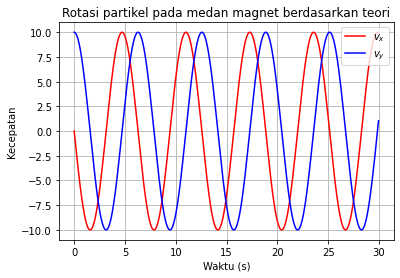

In [23]:
t = np.arange(0, 30, 0.05)
v_x = -10  * np.sin(t)
v_y = 10 * np.cos(t)

plt.figure()
plt.grid()
plt.plot(t, v_x, 'r', label = '$v_x$')
plt.plot(t, v_y, 'b', label = '$v_y$')
plt.title('Rotasi partikel pada medan magnet berdasarkan teori')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend(loc = 1)

plt.show()

In [24]:
#fungsi Runge Kutta ke 4
def rungeKutta(F, t, x, y, h):
    K0 = h * F(t, x, y)
    K1 = h * F(t + h/2.0, x + K0/2.0, y)
    K2 = h * F(t + h/2.0, x + K1/2.0, y)
    K3 = h * F(t + h, x + K2, y)
    return(K0 + 2.0 * K1+ 2.0 * K2 + K3)/6.0

#Fungsi diferensial terkopel
def vx_terkopel(t, vx, vy, q = 1, Bz = 1, m = 1):
    return -q * Bz/m * vy

def vy_terkopel(t, vy, vx, q = 1, Bz = 1, m = 1):
    return q * Bz/m * vx

In [25]:
#Deklarasi input parameter yang dibutuhkan 
vx0 = 0 
vy0 = 10

t0 = 0 
t_stop = 30

h = 0.005

#deklarasi array untuk menyumpan variabel
vxs=[vx0]
vys=[vy0]
ts=[t0]

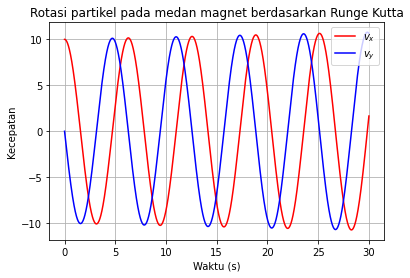

In [26]:
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rungeKutta(vx_terkopel,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rungeKutta(vy_terkopel,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)
    
plt.figure()
plt.grid()
plt.plot(ts, vys, 'r', label = '$v_x$')
plt.plot(ts, vxs, 'b', label = '$v_y$')
plt.title('Rotasi partikel pada medan magnet berdasarkan Runge Kutta')
plt.xlabel('Waktu (s)')
plt.ylabel('Kecepatan')
plt.legend(loc = 1)

plt.show()